0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
(120+0j) (-8+40.218715937006785j) (-8+19.31370849898476j) (-8+11.972846101323912j) (-8+8j) (-8+5.345429103354389j) (-8+3.313708498984761j) (-8+1.5912989390372658j) (-8+0j) (-8-1.5912989390372658j) (-8-3.313708498984761j) (-8-5.345429103354389j) (-8-8j) (-8-11.972846101323912j) (-8-19.31370849898476j) (-8-40.218715937006785j)
120.0 41.0066471638641 20.905007438022025 14.39961957018265 11.313708498984761 9.621518190960723 8.659137602339152 8.156729265666547 8.0


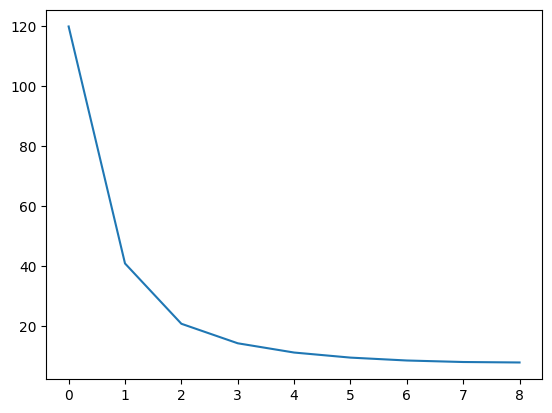

In [68]:
import numpy as np
import matplotlib.pyplot as plt

N = 16
x = range(N)

print(*x)


goal = np.fft.fft(x)

print(*goal)
spec = abs(goal[0:int(N/2) + 1])
print(*spec)
plt.plot(spec)
plt.show()

In [97]:
w = np.zeros(N, dtype=complex)

inR = np.zeros(N)

width = int(np.log2(N))
for i in range(N):
    b = '{:0{width}b}'.format(i, width=width)
    br = int(b[::-1], 2)
    inR[br] = x[i]    
    w[i] = np.round(np.exp(-2*1j*np.pi*(i / N)), 12)

print(*inR)
print(*w)

0.0 8.0 4.0 12.0 2.0 10.0 6.0 14.0 1.0 9.0 5.0 13.0 3.0 11.0 7.0 15.0
(1+0j) (0.923879532511-0.382683432365j) (0.707106781187-0.707106781187j) (0.382683432365-0.923879532511j) -1j (-0.382683432365-0.923879532511j) (-0.707106781187-0.707106781187j) (-0.923879532511-0.382683432365j) (-1-0j) (-0.923879532511+0.382683432365j) (-0.707106781187+0.707106781187j) (-0.382683432365+0.923879532511j) (-0+1j) (0.382683432365+0.923879532511j) (0.707106781187+0.707106781187j) (0.923879532511+0.382683432365j)


In [78]:
off = 0
def gen4():
    return [f"{off}", f"{off + 1}", f"{off  +2}", f"{off + 1}"]


def gen(i):
    global off
    l = []

    if i == 4:
        l+= gen4()
        off += 4
    else:
        l+= gen(i//2)
        l+= gen(i//2)
        l[i//4] = f"{(off-i)+i//4}"
        l[3*i//4] = f"{(off-i)+i//4}"
        

    return l


from collections import namedtuple


Pair = namedtuple("Pair", ['i1','i2'])

gg = gen(N)

special = []

pairs = []

for j in range(N//2 + 1):
    if j == 0 or j == N//2:
        pairs.append(Pair(j,j))
        continue

    val1 = -1
    val2 = -1
    for i in range(len(gg)):
        if int(gg[i]) == j or N-int(gg[i]) == j:
            if i > N//2 and val1 == -1:
                special.append(N-i)
            if val1 == -1:
                val1 = i
                continue
            if val2 == -1:
                val2 = i
                break
    pairs.append(Pair(val1,val2))

120.0 -7.999999999996668 -8.0 40.21871593701445 -8.0 -8.000000000006455 19.313708498992 5.34542910334733 -8.0 -8.000000000003332 -8.0 -1.5912989390304553 8.0 -7.999999999993544 -3.313708498992 -11.97284610133133
120.0 41.00664716387097 20.90500743802871 14.399619570185232 11.313708498984761 9.621518190962169 8.659137602341922 8.156729265668487 8.0


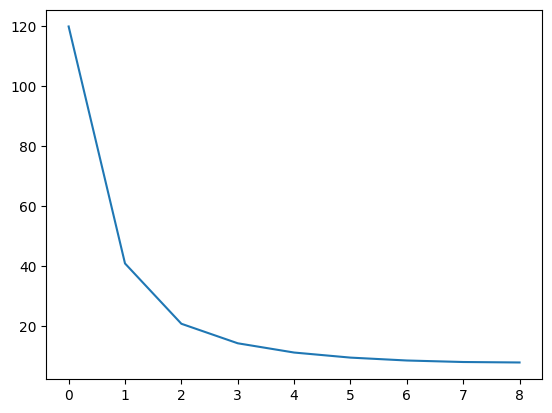

120.0 -7.999999999996668 -8.0 40.21871593701445 -8.0 -8.000000000006455 19.313708498992 5.34542910334733 -8.0 -8.000000000003332 -8.0 -1.5912989390304553 8.0 -7.999999999993544 -3.313708498992 -11.97284610133133


In [128]:
v = np.copy(inR)

p = N

while p > 1:
    p = p//2
    c = N//(2*p)
    r = 0
    rC = c

    for j in range(p):
        for i in range(c):
            if i == c//2 and c != 1:
                continue
            buf = v[r + i]
            v[r + i] = v[r + i] + v[rC + i]
            v[rC + i] = buf + (-1)*v[rC + i]
        r += 2*c
        rC += 2*c

    
    if p == 1:
        break

    rC = 2*c

    for j in range(p//2):
        for i in range(1,2*c):
            wi = i*(p//2)         
            if N//wi == 4:
                v[rC + i] = (-1)*v[rC + i]
            elif wi not in special:            
                tr = np.real(w[wi])
                ti = np.imag(w[wi])

                pairI = 0
                if (rC+i) < N//2:
                    pairI = (rC+i)
                else:
                    pairI = N-(rC+i)

                dis = pairs[pairI].i2 - pairs[pairI].i1                

                buf = v[rC + i]
                v[rC + i] = v[rC + i]*tr + (-1)*(v[rC + i + dis]*ti)
                v[rC + i + dis] = buf*ti + v[rC + i + dis]*tr
        rC += 4*c


    
    

print(*v)

calcSpec = []

for pair in pairs:
    if pair.i1 == pair.i2:
        calcSpec.append(v[pair.i1] * v[pair.i2])
    else:
        calcSpec.append(v[pair.i1] * v[pair.i1] + v[pair.i2] * v[pair.i2])

calcSpec = np.sqrt(calcSpec)

print(*calcSpec)
plt.plot(calcSpec)
plt.show()



p = int(N/2)
c = int(N/(2*p))
r = 0
rC = c

v = np.copy(inR)

for j in range(p):
    buf = v[r]
    v[r] = v[r] + v[rC]
    v[rC] = buf + (-1)*v[rC]
    r += 2*c
    rC += 2*c

p = int(p/2)
c = int(N/(2*p))
r = 0
rC = c

# stage 1.5
for j in range(p):
    v[rC + 1] = (-1)*v[rC + 1]
    rC += 2*c

rC = c

# stage 2
for j in range(p):
    buf = v[r]
    v[r] = v[r] + v[rC]
    v[rC] = buf + (-1)*v[rC]
    r += 2*c
    rC += 2*c

p = int(p/2)
c = int(N/(2*p))
r = 0
rC = c

# stage 2.5
for j in range(p):
    tr = np.real(w[2])
    ti = np.imag(w[2])

    buf = v[rC + 1]
    v[rC + 1] = v[rC + 1]*tr + (-1)*(v[rC + 3]*ti)
    v[rC + 3] = buf*ti + v[rC + 3]*tr

    v[rC + 2] = (-1)*v[rC + 2]
    rC += 2*c

rC = c

# stage 3
for j in range(p):
    for i in range(c):
        if i == int(c/2):
            continue
        buf = v[r + i]
        v[r + i] = v[r + i] + v[rC + i]
        v[rC + i] = buf + (-1)*v[rC + i]
    r += 2*c
    rC += 2*c

p = int(p/2)
c = int(N/(2*p))
r = 0
rC = c

# stage 3.5
for j in range(p):
    tr = np.real(w[1])
    ti = np.imag(w[1])

    buf = v[rC + 1]
    v[rC + 1] = v[rC + 1]*tr + (-1)*(v[rC + 3]*ti)
    v[rC + 3] = buf*ti + v[rC + 3]*tr

    tr = np.real(w[2])
    ti = np.imag(w[2])

    buf = v[rC + 2]
    v[rC + 2] = v[rC + 2]*tr + (-1)*(v[rC + 6]*ti)
    v[rC + 6] = buf*ti + v[rC + 6]*tr

    v[rC + 4] = (-1)*v[rC + 4]

    tr = np.real(w[5])
    ti = np.imag(w[5])

    buf = v[rC + 5]
    v[rC + 5] = v[rC + 5]*tr + (-1)*(v[rC + 7]*ti)
    v[rC + 7] = buf*ti + v[rC + 7]*tr

    rC += 2*c


rC = c

# stage 4
for j in range(p):
    for i in range(c):
        if i == int(c/2):
            continue
        buf = v[r + i]
        v[r + i] = v[r + i] + v[rC + i]
        v[rC + i] = buf + (-1)*v[rC + i]
    r += 2*c
    rC += 2*c

print(*v)

120.0 41.00664716387097 20.90500743802871 14.399619570185232 11.313708498984761 9.621518190962169 8.659137602341922 8.156729265668487 8.0


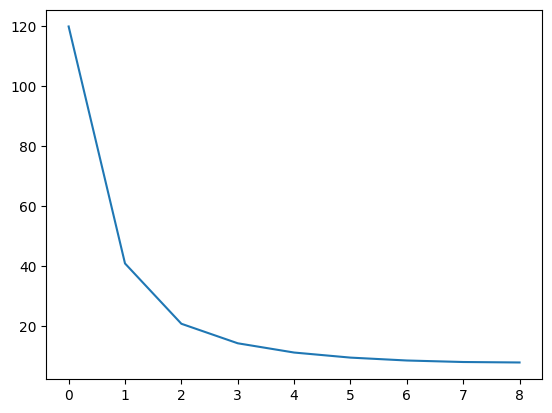

In [106]:


calcSpec = []

for pair in pairs:
    if pair.i1 == pair.i2:
        calcSpec.append(v[pair.i1] * v[pair.i2])
    else:
        calcSpec.append(v[pair.i1] * v[pair.i1] + v[pair.i2] * v[pair.i2])

calcSpec = np.sqrt(calcSpec)

print(*calcSpec)
plt.plot(calcSpec)
plt.show()

